# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Ryan Hangralim
- **Email:** ryanhangralim@gmail.com
- **ID Dicoding:** ryan_hangralim_Pcow

## Menentukan Pertanyaan Bisnis

- Apa saja 10 kategori produk dengan quantitas penjualan yang paling tinggi?
- Bagaimana perbandingan frekuensi metode pembayaran yang digunakan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Untuk menjawab pertanyaan bisnis, maka dataset yang digunakan adalah order_items_dataset.csv, products_dataset.csv dan order_payments_dataset.csv.

In [3]:
order_items = pd.read_csv("data/order_items_dataset.csv")
products = pd.read_csv("data/products_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")

Melihat isi masing-masing dataset

In [4]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Untuk memudahkan explorasi data, akan dilakukan merge atau penggabungan data dari order_items dan product dengan key "product_id"

In [9]:
merged_order = pd.merge(order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')
merged_order.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim


**Insight:**
- Terdapat 2 dataframe yang akan digunakan untuk exploratory dan untuk menjawab pertanyaan bisnis
- Dataframe merged_order berisikan semua pesanan yang ditambahkan kolom nama kategori produk sedangkan dataframe order_payments berisi metode pembayaran setiap pesanan

### Assessing Data

mengenal dataframe

In [16]:
merged_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               112650 non-null  object 
 1   order_item_id          112650 non-null  int64  
 2   product_id             112650 non-null  object 
 3   seller_id              112650 non-null  object 
 4   shipping_limit_date    112650 non-null  object 
 5   price                  112650 non-null  float64
 6   freight_value          112650 non-null  float64
 7   product_category_name  111047 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.9+ MB


In [17]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


mencari tahu missing value masing-masing dataframe

In [12]:
merged_order.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,1603


In [13]:
order_payments.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


mencari tahu apakah terdapat nilai duplikat

In [14]:
merged_order.duplicated().sum()

0

In [15]:
order_payments.duplicated().sum()

0

**Insight:**
- Jumlah baris merged_order adalah 112650 dan jumlah baris order_payments adalah 103886
- Pada merged_order terdapat 1603 baris data yang tidak memiliki kategori sehingga dapat dibersihkan, sedangkan pada order_payments tidak terdapat null value.
- Pada kedua dataframe tidak terdapat nilai duplikat.

### Cleaning Data

Membersihkan data null pada merged_order

In [20]:
merged_order.dropna(axis=0, inplace=True)

melihat hasil cleaning

In [21]:
merged_order.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,0


melihat jumlah value setelah data dibersihkan

In [22]:
merged_order.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
...,...
cds_dvds_musicais,14
la_cuisine,14
pc_gamer,9


In [23]:
order_payments.payment_type.value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


menghilangkan metode pembayaran "not_defined"

In [45]:
order_payments = order_payments[order_payments['payment_type'] != 'not_defined']

In [46]:
order_payments.payment_type.value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529


**Insight:**
- order_merged sudah tidak memiliki data null lagi setelah dibersihkan
- Tidak ada lagi order dengan pembayaran 'not_defined'

## Exploratory Data Analysis (EDA)

### Explore ...

melihat parameter statistik

In [25]:
merged_order.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
count,111047,111047.000000,111047,111047,111047,111047.000000,111047.000000,111047
unique,97277,NaN,32341,3035,92070,NaN,NaN,73
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,cama_mesa_banho
freq,21,NaN,527,2033,21,NaN,NaN,11115
mean,NaN,1.198213,NaN,NaN,NaN,120.778665,20.025212,NaN
std,NaN,0.706872,NaN,NaN,NaN,183.419692,15.840571,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.300000,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,NaN


In [26]:
order_payments.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Melihat urutan kategori yang terjual

In [31]:
merged_order.groupby(by="product_category_name").product_category_name.count().sort_values(ascending=False)

,product_category_name
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
...,...
cds_dvds_musicais,14
la_cuisine,14
pc_gamer,9


Melihat urutan metode pembayaran

In [32]:
order_payments.groupby(by="payment_type").payment_type.count().sort_values(ascending=False)

,payment_type
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


**Insight:**
- Dari tabel-tabel di atas dapat dilihat metode pembayaran terbanyak
- Dari tabel-tabel di atas dapat dilihat kategori produk terjual terbanyak

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Untuk mencari tahu top 10 kategori produk yang terjual, maka akan digunakan bar chart sebagai alat visualisasi

mengambil data yang dibutuhkan untuk visualisasi

In [36]:
category_bar_data = merged_order['product_category_name'].value_counts().reset_index()
category_bar_data.columns = ['product_category_name', 'count']

mengambil top 10 category

In [38]:
top_10_category = category_bar_data.head(10)

memvisualisasikan data

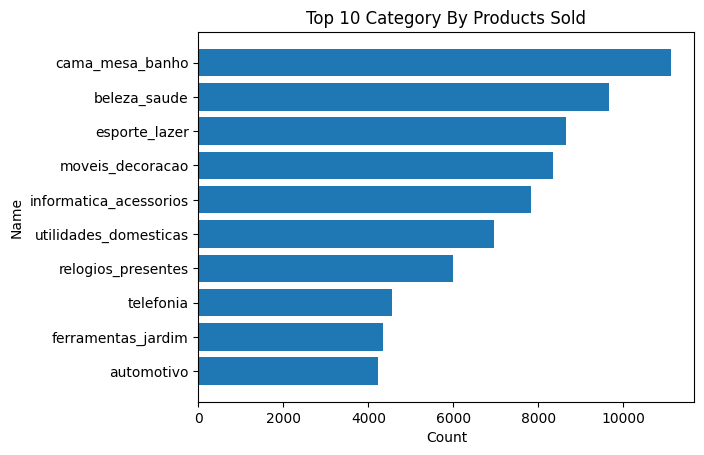

In [44]:
plt.barh(top_10_category['product_category_name'], top_10_category['count'])
plt.title("Top 10 Category By Products Sold")
plt.xlabel("Count")
plt.ylabel("Name")
plt.gca().invert_yaxis()
plt.show()

### Pertanyaan 2:

Untuk mengetahui perbandingan frekuensi maka dapat digunakan pie chart sebagai alat visualisasi

mengambil data yang dibutuhkan terlebih dahulu

In [47]:
payment_counts = order_payments['payment_type'].value_counts().reset_index()
payment_counts.columns = ['method', 'count']

memvisualisasikan data

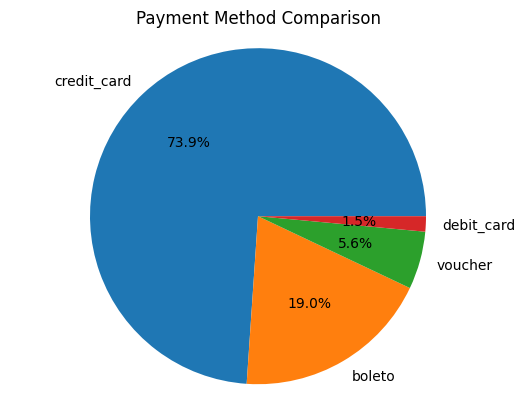

In [53]:
plt.pie(x=payment_counts['count'], labels=payment_counts['method'], autopct='%1.1f%%')
plt.title('Payment Method Comparison')
plt.axis('equal')
plt.show()

**Insight:**
- Dari pertanyaan 1, dapat dilihat pada bar chart 10 kategori dengan penjualan terbanyak dengan cama_mesa_banho menduduki peringkat 1
- Dari pertanyaan 2, dapat dilihat perbandingan penggunaaan metode pembayaran dimana credit_card merupakan metode yang paling banyak digunakan yakni 73.9%

## Analisis Lanjutan (Opsional)

## Conclusion

- Pertnyataan bisnis 1 dapat dijawab dengan hasil visualisasi yang ada pada tahap visualisasi dalam bentuk bar chart
- Pernyataan bisnis 2 dapat dijawab dengan hasil visualisasi yang ada pada tahap visualisasi dalam bentuk pie chart